In [1]:
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr, kendalltau

import sys
sys.path.append('..')
from attention.utils.paths import path_figures as path_save
from attention.utils.results import category_set_summary

In [2]:
def plot_regression(ax, x, ytrue, model, label):
    xminmax = [min(x), max(x)]
    ypred = model.predict(sm.add_constant(xminmax)[:, None])
    if label == 'in':
        ax.plot(x, ytrue, '+k')
        ax.plot(xminmax, ypred, '--r', label='in-set')
    else:
        ax.plot(x, ytrue, 'xk')
        ax.plot(xminmax, ypred, ':b', label='out-of-set')
    ax.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
    return ax

In [3]:
def regression(x, y, label, print_stats=True):
    x0 = np.array(x)[:, None]
    x1 = sm.add_constant(x0)
    y = np.array(y)[:, None]
    lr_skl = LinearRegression().fit(x0, y)
    lr_sm = sm.OLS(y, x1).fit()
    
    if print_stats:
        print('\n'+label)
        print('SKL: beta0, beta1, R2')
        print([round(a, 4) for a in [lr_skl.intercept_[0], lr_skl.coef_[0][0], lr_skl.score(x0, y)]])

        print('SM: beta0, beta1, R2')
        print([round(a, 4) for a in lr_sm.params], round(lr_sm.rsquared, 4))

        print('SM: p0, p1')
        print([f'{a:.5f}' for a in lr_sm.pvalues])
    
    return lr_sm

In [4]:
small = 8
medium = 10
big = 12

plt.rc('font', size=medium) # default fontsize
plt.rc('axes', titlesize=big) # fontsize of the axes title
plt.rc('axes', labelsize=big) # fontsize of the x and y labels
plt.rc('xtick', labelsize=big) # fontsize of the tick labels
plt.rc('ytick', labelsize=big) # fontsize of the tick labels
plt.rc('legend', fontsize=medium) # legend fontsize
plt.rc('figure', titlesize=big) # fontsize of the figure title

In [5]:
df_diff = category_set_summary(type_category_set='diff', version_wnids=2, version_weights=3)
df_diff.head()

,size,similarity,acc_base_in,acc_base_out,acc_trained_in,acc_trained_out,acc_change_in,acc_change_out,num_epochs
0,50,0.428614,0.2778,0.683800,0.460963,0.506764,0.183163,-0.177036,93
1,50,0.449497,0.3992,0.677411,0.585833,0.516995,0.186633,-0.160416,87
2,50,0.417057,0.4828,0.673011,0.674875,0.527377,0.192075,-0.145634,105
3,50,0.436500,0.4914,0.672558,0.669160,0.516080,0.177760,-0.156477,94
4,50,0.429094,0.5314,0.670453,0.717970,0.497993,0.186570,-0.172460,102


In [6]:
df_size_v6 = category_set_summary(type_category_set='size', version_wnids=4, version_weights=6).iloc[1:]
df_size_v6.head()

,size,similarity,acc_base_in,acc_base_out,acc_trained_in,acc_trained_out,acc_change_in,acc_change_out,num_epochs
1,2,0.471780,0.700000,0.663427,0.949495,0.586551,0.249495,-0.076875,300
2,4,0.460416,0.652500,0.663544,0.973545,0.517930,0.321045,-0.145615,300
3,8,0.402342,0.677500,0.663387,0.951872,0.387327,0.274372,-0.276060,300
4,16,0.382833,0.675000,0.663313,0.898417,0.444692,0.223417,-0.218621,174
5,32,0.424631,0.666875,0.663388,0.845651,0.469524,0.178776,-0.193864,137


In [7]:
df_size_v7 = category_set_summary(type_category_set='size', version_wnids=5, version_weights=7).iloc[1:]
df_size_v7.head()

,size,similarity,acc_base_in,acc_base_out,acc_trained_in,acc_trained_out,acc_change_in,acc_change_out,num_epochs
1,2,0.298697,0.670000,0.663487,0.940000,0.589368,0.270000,-0.074119,300
2,4,0.345680,0.647500,0.663564,0.956989,0.455257,0.309489,-0.208307,300
3,8,0.473047,0.705000,0.663165,0.945736,0.461182,0.240736,-0.201984,300
4,16,0.441069,0.679375,0.663242,0.886889,0.425643,0.207514,-0.237599,197
5,32,0.440449,0.675000,0.663120,0.847413,0.476740,0.172413,-0.186380,127


In [8]:
df_sim_v3 = category_set_summary(type_category_set='sim', version_wnids=3, version_weights=3)
df_sim_v3.head()

,size,similarity,acc_base_in,acc_base_out,acc_trained_in,acc_trained_out,acc_change_in,acc_change_out,num_epochs
0,50,0.716746,0.6046,0.666600,0.760448,0.525034,0.155848,-0.141566,89
1,50,0.512130,0.6286,0.665337,0.802811,0.507715,0.174211,-0.157622,93
2,50,0.453881,0.6612,0.663621,0.802083,0.536498,0.140883,-0.127123,90
3,50,0.427748,0.6914,0.662032,0.832715,0.516972,0.141315,-0.145060,93
4,50,0.671111,0.7006,0.661547,0.800494,0.524112,0.099894,-0.137435,94


In [9]:
df_sim_v4 = category_set_summary(type_category_set='sim', version_wnids=4, version_weights=4)
df_sim_v4.head()

,size,similarity,acc_base_in,acc_base_out,acc_trained_in,acc_trained_out,acc_change_in,acc_change_out,num_epochs
0,50,0.719259,0.6030,0.666684,0.745228,0.510016,0.142228,-0.156669,88
1,50,0.568134,0.6800,0.662632,0.814936,0.521299,0.134936,-0.141333,94
2,50,0.489926,0.6686,0.663232,0.817018,0.512321,0.148418,-0.150911,99
3,50,0.425019,0.6642,0.663463,0.796205,0.519950,0.132005,-0.143513,98
4,50,0.811888,0.7256,0.660232,0.778363,0.572821,0.052763,-0.087411,74


In [10]:
x_diff = 1 - df_diff['acc_base_in']
y_diff_in = df_diff['acc_change_in']
y_diff_out = df_diff['acc_change_out']
lr_diff_in = regression(x_diff, y_diff_in, 'diff_in')
lr_diff_out = regression(x_diff, y_diff_out, 'diff_out')

x_size = np.log2(np.concatenate((df_size_v6['size'], df_size_v7['size'])))
y_size_in = np.concatenate((df_size_v6['acc_change_in'], df_size_v7['acc_change_in']))
y_size_out = np.concatenate((df_size_v6['acc_change_out'], df_size_v7['acc_change_out']))
lr_size_in = regression(x_size, y_size_in, 'size_in')
lr_size_out = regression(x_size, y_size_out, 'size_out')

x_sim = np.concatenate((df_sim_v3['similarity'], df_sim_v4['similarity']))
y_sim_in = np.concatenate((df_sim_v3['acc_change_in'], df_sim_v4['acc_change_in']))
y_sim_out = np.concatenate((df_sim_v3['acc_change_out'], df_sim_v4['acc_change_out']))
lr_sim_in = regression(x_sim, y_sim_in, 'sim_in')
lr_sim_out = regression(x_sim, y_sim_out, 'sim_out')


diff_in
SKL: beta0, beta1, R2
[0.0456, 0.2412, 0.8564]
SM: beta0, beta1, R2
[0.0456, 0.2412] 0.8564
SM: p0, p1
['0.00004', '0.00000']

diff_out
SKL: beta0, beta1, R2
[-0.1116, -0.0813, 0.6863]
SM: beta0, beta1, R2
[-0.1116, -0.0813] 0.6863
SM: p0, p1
['0.00000', '0.00000']

size_in
SKL: beta0, beta1, R2
[0.3585, -0.04, 0.9257]
SM: beta0, beta1, R2
[0.3585, -0.04] 0.9257
SM: p0, p1
['0.00000', '0.00000']

size_out
SKL: beta0, beta1, R2
[-0.2113, 0.016, 0.2729]
SM: beta0, beta1, R2
[-0.2113, 0.016] 0.2729
SM: p0, p1
['0.00001', '0.01812']

sim_in
SKL: beta0, beta1, R2
[0.1947, -0.1141, 0.3894]
SM: beta0, beta1, R2
[0.1947, -0.1141] 0.3894
SM: p0, p1
['0.00000', '0.00002']

sim_out
SKL: beta0, beta1, R2
[-0.1722, 0.0639, 0.3063]
SM: beta0, beta1, R2
[-0.1722, 0.0639] 0.3063
SM: p0, p1
['0.00000', '0.00021']


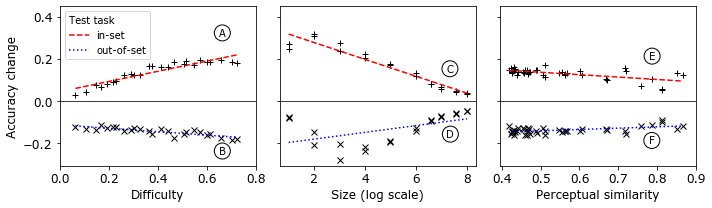

In [11]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif']=['Verdana']
style_bbox = dict(boxstyle='circle', facecolor='none', edgecolor='black')

fig, ax = plt.subplots(1, 3, sharey=True, figsize=(10, 3))

ax[0] = plot_regression(ax[0], x_diff, y_diff_in, lr_diff_in, 'in')
ax[0] = plot_regression(ax[0], x_diff, y_diff_out, lr_diff_out, 'out')
ax[0].set_xlabel('Difficulty')
ax[0].set_ylabel('Accuracy change')
ax[0].set_xticks(list(np.arange(0, 1, 0.2)))
leg = ax[0].legend(title='Test task')
leg._legend_box.align = 'left'

ax[1] = plot_regression(ax[1], x_size, y_size_in, lr_size_in, 'in')
ax[1] = plot_regression(ax[1], x_size, y_size_out, lr_size_out, 'out')
ax[1].set_xlabel('Size (log scale)')
ax[1].set_xticks(range(2, 10, 2))

ax[2] = plot_regression(ax[2], x_sim, y_sim_in, lr_sim_in, 'in')
ax[2] = plot_regression(ax[2], x_sim, y_sim_out, lr_sim_out, 'out')
ax[2].set_xlabel('Perceptual similarity')
# ax[2].legend(title='Test task')
ax[2].set_xticks(np.arange(0.4, 1, 0.1))
ax[2].set_ylim(top=0.45)

ax[0].text(x=0.9*max(x_diff),y=0.31, s='A', bbox=style_bbox)
ax[0].text(x=0.9*max(x_diff),y=-0.25, s='B', bbox=style_bbox)
ax[1].text(x=0.9*max(x_size),y=0.14, s='C', bbox=style_bbox)
ax[1].text(x=0.9*max(x_size),y=-0.17, s='D', bbox=style_bbox)
ax[2].text(x=0.9*max(x_sim),y=0.2, s='E', bbox=style_bbox)
ax[2].text(x=0.9*max(x_sim),y=-0.2, s='F', bbox=style_bbox)

plt.tight_layout()
# plt.savefig(path_save/'regression_v2.pdf')
# plt.savefig('/Users/fbickfordsmith/Downloads/test.pdf')
plt.show()

In [12]:
len(x_diff), len(x_size), len(x_sim)

(25, 20, 40)

In [13]:
x_y_label = [
    [x_diff, y_diff_in, 'difficulty_in'],
    [x_diff, y_diff_out, 'difficulty_out'],
    [x_size, y_size_in, 'size_in'],
    [x_size, y_size_out, 'size_out'],
    [x_sim, y_sim_in, 'similarity_in'],
    [x_sim, y_sim_out, 'similarity_out']]

stats = []
for x, y, label in x_y_label:
    lr = regression(x, y, label, False)
    spearman = spearmanr(x, y)
    kendall = kendalltau(x, y)
    property_, categories = label.split('_')
    stats.append([
        property_, categories, spearman.correlation, spearman.pvalue, kendall.correlation, kendall.pvalue,
        lr.params[0], lr.pvalues[0], lr.params[1], lr.pvalues[1], lr.rsquared])

names = (
    'property', 'categories', 'rho', 'p_rho', 'tau', 'p_tau',
    'beta0', 'p_beta0', 'beta1', 'p_beta1', 'R2')

precision = {}
for name in names[2:]:
    if 'p_' in name:
        precision[name] = 4
    else:
        precision[name] = 2

df = pd.DataFrame(data=stats, columns=names)
df.round(precision)

,property,categories,rho,p_rho,tau,p_tau,beta0,p_beta0,beta1,p_beta1,R2
0,difficulty,in,0.93,0.0000,0.79,0.0000,0.05,0.0,0.24,0.0000,0.86
1,difficulty,out,-0.83,0.0000,-0.65,0.0000,-0.11,0.0,-0.08,0.0000,0.69
2,size,in,-0.97,0.0000,-0.91,0.0000,0.36,0.0,-0.04,0.0000,0.93
3,size,out,0.69,0.0009,0.59,0.0003,-0.21,0.0,0.02,0.0181,0.27
4,similarity,in,-0.53,0.0004,-0.38,0.0006,0.19,0.0,-0.11,0.0000,0.39
5,similarity,out,0.37,0.0200,0.27,0.0154,-0.17,0.0,0.06,0.0002,0.31


In [14]:
print(df.round(precision)[['property', 'categories', 'rho', 'tau', 'beta0', 'beta1', 'R2']].to_latex(index=False))

\begin{tabular}{llrrrrr}
\toprule
   property & categories &   rho &   tau &  beta0 &  beta1 &    R2 \\
\midrule
 difficulty &         in &  0.93 &  0.79 &   0.05 &   0.24 &  0.86 \\
 difficulty &        out & -0.83 & -0.65 &  -0.11 &  -0.08 &  0.69 \\
       size &         in & -0.97 & -0.91 &   0.36 &  -0.04 &  0.93 \\
       size &        out &  0.69 &  0.59 &  -0.21 &   0.02 &  0.27 \\
 similarity &         in & -0.53 & -0.38 &   0.19 &  -0.11 &  0.39 \\
 similarity &        out &  0.37 &  0.27 &  -0.17 &   0.06 &  0.31 \\
\bottomrule
\end{tabular}

